<a href="https://colab.research.google.com/github/MohanPutluru/H_Dataset/blob/main/All_device_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bf2c6a61-00b8-44d1-806d-9e1299cdc007_processed.csv to bf2c6a61-00b8-44d1-806d-9e1299cdc007_processed.csv


In [12]:
!pip install -U -q PyDrive
!pip install -U -q pyunpack
!pip install -U -q patool 

     |████████████████████████████████| 77 kB 2.5 MB/s 


In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
#https://drive.google.com/file/d/1Y3VaTvHN_lIR-abdhsVEYFWmBGcpvD4M/view?usp=sharing

#@title uploader
file_id = "1Y3VaTvHN_lIR-abdhsVEYFWmBGcpvD4M" #@param {type:"string"}


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html


from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

# Replace the assignment below with your file ID
# to download a different file.
#
# A file ID looks like: 1gLBqEWEBQDYbKCDigHnUXNTkzl-OslSO

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  
fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

!unzip {fileId['title']}


Copy of Hawaii Traffic Header Data.7z
unzip:  cannot find or open Copy, Copy.zip or Copy.ZIP.


In [13]:
from pyunpack import Archive
Archive('Copy of Hawaii Traffic Header Data.7z').extractall("Hawai")

In [1]:
#imports
import pandas as pd                  
import numpy as np
import sqlalchemy as sa
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import sqlite3
from sqlite3 import Error
from matplotlib import pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D 
import networkx as nx
#from tabulate import tabulate

jjj="bf2c6a61-00b8-44d1-806d-9e1299cdc007_processed.csv"
df1= pd.read_csv(jjj)
df1['Protocol'] = df1.Protocol.astype('category')
df1['SourceMACAddress'] = df1.SourceMACAddress.astype('category')
df1['Device'] = df1.Device.astype('category')
df1['SourceIP'] = df1.SourceIP.astype('category')
df1['DestinationMACAddress'] = df1.DestinationMACAddress.astype('category')
df1['SourcePort'] = df1.SourcePort.astype('category')
df1['DestinationPort'] = df1.DestinationPort.astype('category')
df1['DestinationIP'] = df1.DestinationIP.astype('category')
df1['Whitelisted'] = df1.Whitelisted.astype('category')
df1=df1.drop(['Unnamed: 0'], axis=1)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Zone'] = df1.Zone.astype('category')
df1.info()

FileNotFoundError: ignored

In [ ]:
df2=df1
df2.info()
df2=df2.drop(['Date'], axis=1)
import numpy as np
from kmodes.kmodes import KModes
#km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)
#clusters = km.fit_predict(df2)

#KPrototypes(n_clusters=k, init='Huang', n_init=2, n_jobs=30).fit(data[:N_kproto, :], categorical=list(range(M - MN, M)))
clusters= KModes(n_clusters=2, init='Huang', n_init=2, n_jobs=300).fit_predict(df2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488358 entries, 0 to 1488357
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Device                 1488358 non-null  category      
 1   Protocol               1488358 non-null  category      
 2   SourceIP               1488358 non-null  category      
 3   SourceMACAddress       1488358 non-null  category      
 4   SourcePort             1488358 non-null  category      
 5   DestinationIP          1488358 non-null  category      
 6   DestinationMACAddress  1488358 non-null  category      
 7   DestinationPort        1488358 non-null  category      
 8   Whitelisted            1488358 non-null  category      
 9   Date                   1488358 non-null  datetime64[ns]
 10  Zone                   1488358 non-null  category      
dtypes: category(10), datetime64[ns](1)
memory usage: 29.3 MB


In [ ]:
df1.info()
df1['cluster_kmodes']=clusters.tolist()
df1['cluster_kmodes'] = df1['cluster_kmodes'].astype('category')
df1['cluster_kmodes'].value_counts()
df1.value_counts(["SourceIP", "cluster_kmodes"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488358 entries, 0 to 1488357
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Device                 1488358 non-null  category      
 1   Protocol               1488358 non-null  category      
 2   SourceIP               1488358 non-null  category      
 3   SourceMACAddress       1488358 non-null  category      
 4   SourcePort             1488358 non-null  category      
 5   DestinationIP          1488358 non-null  category      
 6   DestinationMACAddress  1488358 non-null  category      
 7   DestinationPort        1488358 non-null  category      
 8   Whitelisted            1488358 non-null  category      
 9   Date                   1488358 non-null  datetime64[ns]
 10  Zone                   1488358 non-null  category      
 11  cluster_kmodes         1488358 non-null  category      
dtypes: category(11), datetime64[

SourceIP       cluster_kmodes
172.20.0.40    1                 524556
10.72.2.73     0                 503009
10.72.2.66     1                 209563
192.168.1.10   0                 113601
192.168.1.1    1                  62443
10.53.0.135    1                  55963
172.20.0.225   1                  12485
10.72.2.87     1                   4448
192.168.1.2    1                    864
10.72.2.87     0                    342
172.20.0.10    1                    233
10.72.2.65     1                    222
172.20.0.50    1                    205
10.72.2.79     0                     95
10.53.0.16     1                     94
192.168.1.5    1                     68
169.254.1.123  0                     48
192.168.1.13   0                     47
10.53.0.1      1                     25
192.168.1.20   0                     20
192.168.3.1    1                     15
192.168.1.1    0                      5
192.168.1.25   0                      3
172.20.0.20    1                      3
10.53.0.13

<Figure size 432x288 with 0 Axes>

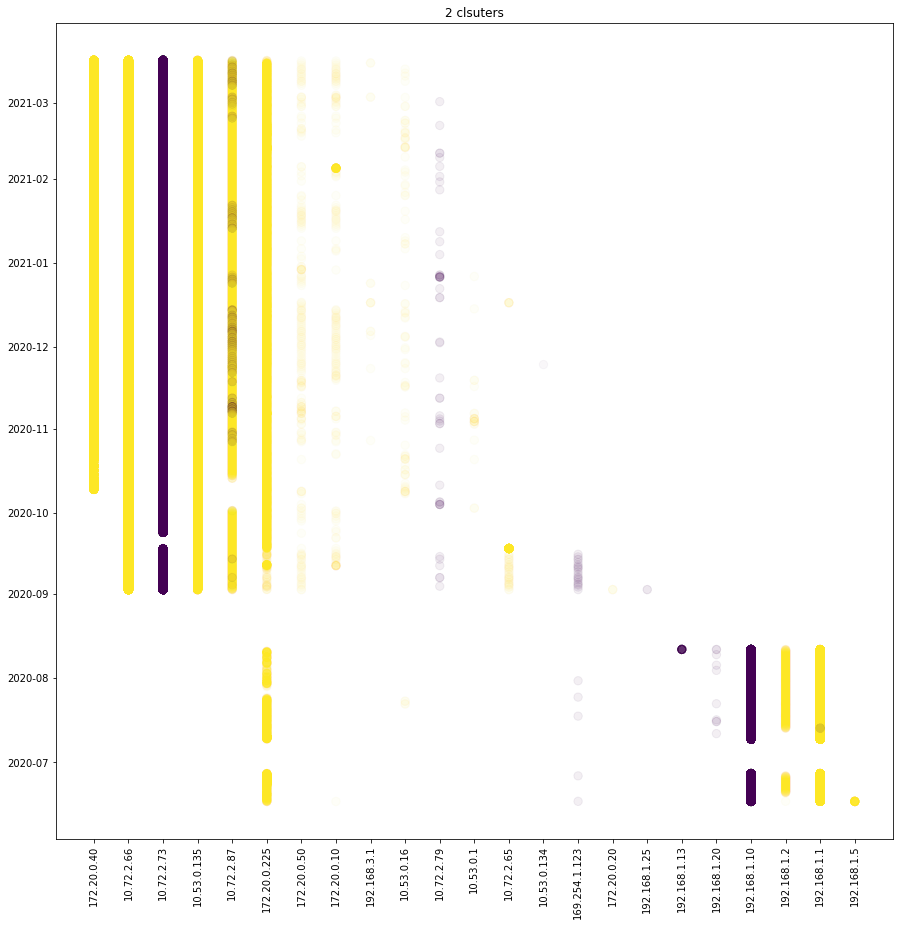

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(15, 15))
plt.scatter(df1['SourceIP'], df1['Date'], c=df1['cluster_kmodes'], alpha=0.03, s=70)
plt.xticks(rotation = 90)
#plt.scatter(result[:, 2], result[:, 9], c=co)
plt.title("2 clsuters")
plt.show()


In [ ]:

from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
onehot_encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()
y = df1['cluster_kmodes']
#y = label_encoder.fit_transform(y)
X = df1=df1.drop(['cluster_kmodes'], axis=1)
#X = onehot_encoder.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

NameError: ignored

In [ ]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))
len(y_test)

Accuracy: 100.00


491159

In [ ]:
len(y_train)

997199